In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#data = pd.read_csv("/content/drive/My Drive/train.csv", low_memory = False)
data = pd.read_csv("/Users/snehakarki/Downloads/archive (3)/train.csv", low_memory = False)

## Exploratory Data Analysis 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
25718,0xacb0,CUS_0xc375,July,Richardn,51,180-18-8849,Engineer,97577.28,NaN,3,...,Good,708.73,25.583174,32 Years and 1 Months,NM,92.866507,655.6246833779472,Low_spent_Large_value_payments,312.15281001326247,Standard
53684,0x1508e,CUS_0x1572,May,Martin Pettys,39,031-16-3010,Engineer,83384.2,7080.683333,3,...,_,2613.85,41.359017,12 Years and 3 Months,Yes,112.010415,160.99142599560898,High_spent_Medium_value_payments,685.0664926134716,Poor
55072,0x158b2,CUS_0xc88,January,Greg Roumeliotish,44,354-83-1291,Doctor,29378.06,2312.171667,7,...,Standard,1078.84,36.209726,17 Years and 10 Months,Yes,93.017293,85.1754101548283,High_spent_Small_value_payments,313.0244633331222,Standard
71441,0x1b89b,CUS_0x544a,February,Carey Gillamt,37,331-09-2203,Scientist,14007.82,NaN,9,...,Bad,3279.57,29.504394,12 Years and 6 Months,Yes,37.354982,16.98528479144207,High_spent_Medium_value_payments,316.2915662495827,Standard
99603,0x25d9d,CUS_0x5d6d,April,Martinb,38,957-01-2791,Writer,126514.72,10341.893333,8,...,Standard,470.42,40.446888,29 Years and 5 Months,No,312.032853,314.0426714214229,High_spent_Medium_value_payments,658.113808729187,Good
45841,0x1229b,CUS_0xab7d,February,Lionelp,48,844-45-6184,Architect,58366.22,5041.851667,5,...,Good,383.3,39.472442,22 Years and 9 Months,No,36.110277,69.60721180107132,High_spent_Large_value_payments,638.4676780858928,Good
10297,0x5257,CUS_0x1c82,February,NaN,46,516-03-1114,Entrepreneur,62719.36,5315.613333,1,...,Good,73.8,38.383340,NaN,No,58.315638,280.35454880268054,High_spent_Small_value_payments,452.8911463020839,Standard
30831,0xcaa5,CUS_0x1220,August,Berkowitze,31,#F%$D@*&8,Architect,128494.52,10580.876667,4,...,Good,722.25,31.238781,28 Years and 8 Months,No,176.904610,__10000__,High_spent_Large_value_payments,995.2348625854976,Good
73642,0x1c580,CUS_0x3b1f,March,Soyoung Kimb,20,736-65-7068,Doctor,44103.18,3416.265000,3,...,Standard,2576.96,34.943721,13 Years and 6 Months,Yes,107.463129,68.85446188036681,High_spent_Large_value_payments,405.30890934038763,Standard
89558,0x222c0,CUS_0xbfbf,July,Tim Hephers,43,167-92-5388,Mechanic,59426.92,4363.489902,6,...,Bad,4489.87,34.684716,10 Years and 1 Months,Yes,643.471410,37.899396050759286,High_spent_Large_value_payments,403.9069579824609,Standard


In [7]:
first_row = data.iloc[0]

# Displaying the first row
first_row

ID                                                                     0x1602
Customer_ID                                                         CUS_0xd40
Month                                                                 January
Name                                                            Aaron Maashoh
Age                                                                        23
SSN                                                               821-00-0265
Occupation                                                          Scientist
Annual_Income                                                        19114.12
Monthly_Inhand_Salary                                             1824.843333
Num_Bank_Accounts                                                           3
Num_Credit_Card                                                             4
Interest_Rate                                                               3
Num_of_Loan                                                     

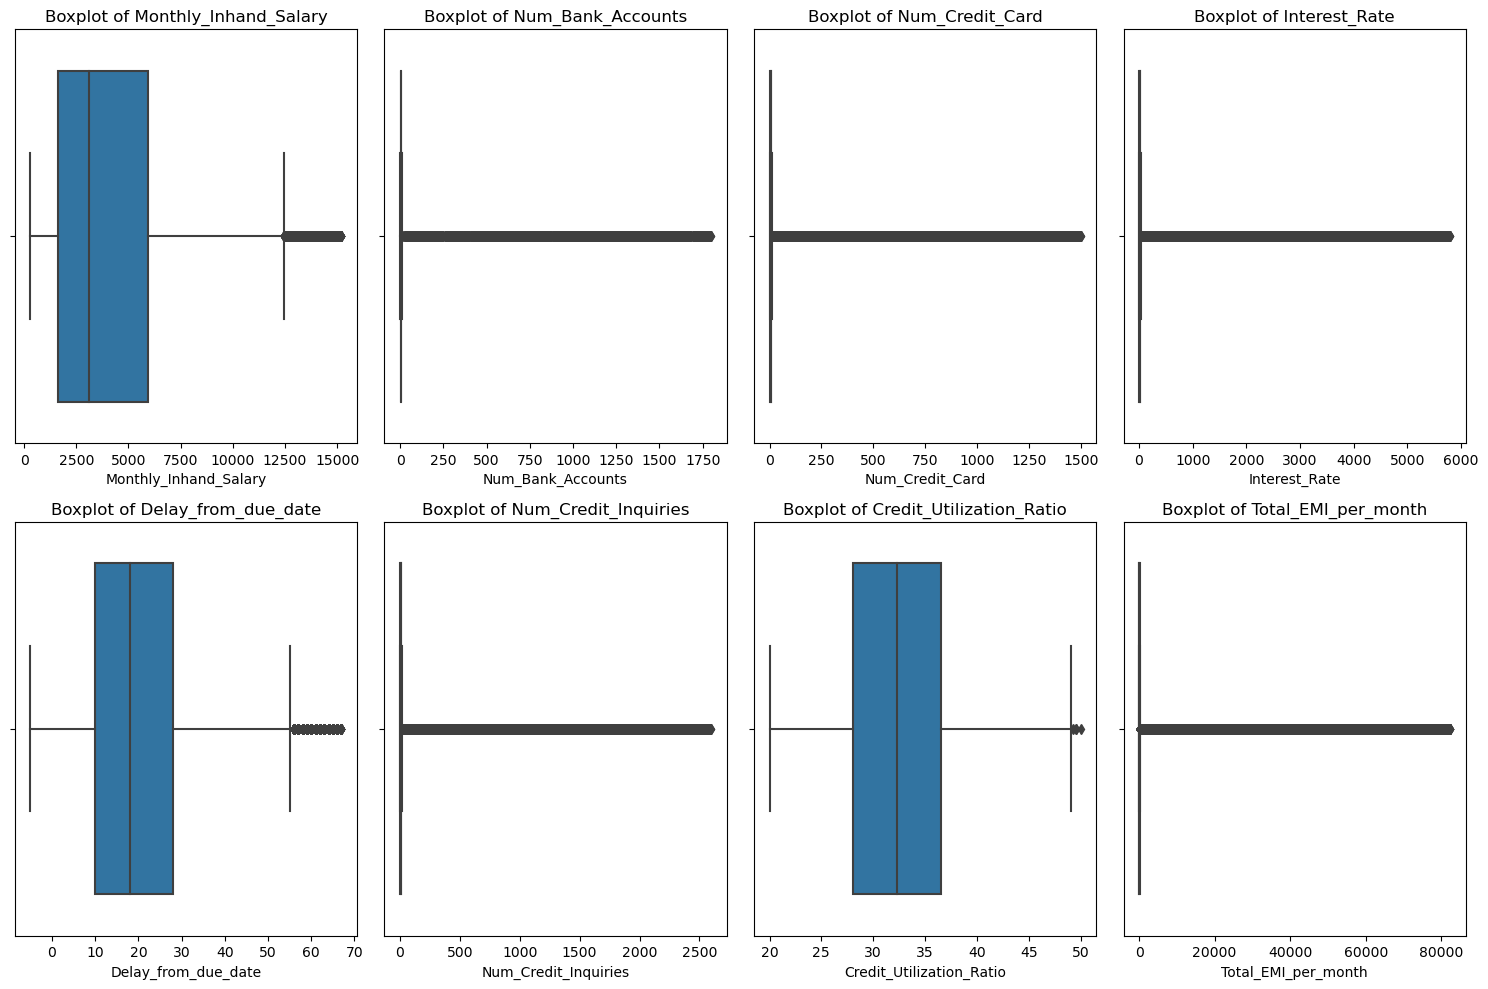

In [8]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of columns for the grid layout
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature and create a boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Remove any unused subplots
for j in range(len(numerical_features), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
columns_to_drop = ['ID', 'Customer_ID', 'SSN', 'Type_of_Loan',
                   'Credit_History_Age','Age','Month',
                   'Occupation', 'Name',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_Behaviour']

subset_data = data[columns_to_drop]

# Display the subset dataframe
subset_data.head(15)

,ID,Customer_ID,SSN,Type_of_Loan,Credit_History_Age,Age,Month,Occupation,Name,Changed_Credit_Limit,Num_Credit_Inquiries,Payment_Behaviour
0,0x1602,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 1 Months,23,January,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Small_value_payments
1,0x1603,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,February,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Large_value_payments
2,0x1604,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 3 Months,-500,March,Scientist,Aaron Maashoh,_,4.0,Low_spent_Medium_value_payments
3,0x1605,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 4 Months,23,April,Scientist,Aaron Maashoh,6.27,4.0,Low_spent_Small_value_payments
4,0x1606,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 5 Months,23,May,Scientist,Aaron Maashoh,11.27,4.0,High_spent_Medium_value_payments
5,0x1607,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 6 Months,23,June,Scientist,Aaron Maashoh,9.27,4.0,!@9#%8
6,0x1608,CUS_0xd40,821-00-0265,"Auto Loan, Credit-Builder Loan, Personal Loan,...",22 Years and 7 Months,23,July,Scientist,Aaron Maashoh,11.27,4.0,Low_spent_Small_value_payments
7,0x1609,CUS_0xd40,#F%$D@*&8,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,23,August,Scientist,NaN,11.27,4.0,High_spent_Medium_value_payments
8,0x160e,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 7 Months,28_,January,_______,Rick Rothackerj,5.42,2.0,Low_spent_Small_value_payments
9,0x160f,CUS_0x21b1,004-07-5839,Credit-Builder Loan,26 Years and 8 Months,28,February,Teacher,Rick Rothackerj,7.42,2.0,High_spent_Large_value_payments


'Monthly_Balance' - aggregate!, can still use these 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary',
                   'Total_EMI_per_month', 'Amount_invested_monthly'

In [10]:
data_cleaned = data.drop(columns=columns_to_drop)

In [11]:
data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3,7,_,809.98,26.822620,No,49.574949,80.41529543900253,312.49408867943663,Good
1,19114.12,NaN,3,4,3,4,-1,NaN,Good,809.98,31.944960,No,49.574949,118.28022162236736,284.62916249607184,Good
2,19114.12,NaN,3,4,3,4,3,7,Good,809.98,28.609352,No,49.574949,81.699521264648,331.2098628537912,Good
3,19114.12,NaN,3,4,3,4,5,4,Good,809.98,31.377862,No,49.574949,199.4580743910713,223.45130972736786,Good
4,19114.12,1824.843333,3,4,3,4,6,NaN,Good,809.98,24.797347,No,49.574949,41.420153086217326,341.48923103222177,Good
5,19114.12,NaN,3,4,3,4,8,4,Good,809.98,27.262259,No,49.574949,62.430172331195294,340.4792117872438,Good
6,19114.12,1824.843333,3,4,3,4,3,8_,Good,809.98,22.537593,No,49.574949,178.3440674122349,244.5653167062043,Good
7,19114.12,1824.843333,3,4,3,4,3,6,Good,809.98,23.933795,No,49.574949,24.785216509052056,358.12416760938714,Standard
8,34847.84,3037.986667,2,4,6,1,3,4,Good,605.03,24.464031,No,18.816215,104.291825168246,470.69062692529184,Standard
9,34847.84,3037.986667,2,4,6,1,7,1,Good,605.03,38.550848,No,18.816215,40.39123782853101,484.5912142650067,Good


In [12]:
numeric_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                   'Num_Credit_Card', 'Interest_Rate',	'Num_of_Loan',
                   'Delay_from_due_date',	'Num_of_Delayed_Payment',
                   'Outstanding_Debt',	'Credit_Utilization_Ratio',
                   'Total_EMI_per_month',	'Amount_invested_monthly','Monthly_Balance']

# Define a regular expression pattern to match special characters
pattern = r'[^\d.]'

# Remove special characters from numeric columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].replace(pattern, '', regex=True)

# Convert columns back to numeric
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].astype(float)

data_cleaned.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,_,809.98,26.822620,No,49.574949,80.415295,312.494089,Good
1,19114.12,NaN,3.0,4.0,3.0,4.0,-1.0,NaN,Good,809.98,31.944960,No,49.574949,118.280222,284.629162,Good
2,19114.12,NaN,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,28.609352,No,49.574949,81.699521,331.209863,Good
3,19114.12,NaN,3.0,4.0,3.0,4.0,5.0,4.0,Good,809.98,31.377862,No,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,NaN,Good,809.98,24.797347,No,49.574949,41.420153,341.489231,Good
5,19114.12,NaN,3.0,4.0,3.0,4.0,8.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,Good,809.98,23.933795,No,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,Good,605.03,24.464031,No,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good


In [13]:

print(data_cleaned.dtypes)

Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [14]:
data_cleaned.sample(10
                  )

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
71361,69571.30,5805.608333,5.0,7.0,2.0,0.0,10.0,3.0,Good,36.92,38.548645,No,0.000000,NaN,528.970923,Standard
79251,11073.60,699.800000,3.0,3.0,13.0,4.0,7.0,15.0,Standard,1097.02,36.960928,NM,27.757644,47.269928,274.952428,Standard
20548,65538.64,5633.553333,9.0,7.0,23.0,8.0,41.0,NaN,_,1791.14,33.270078,Yes,359.263237,170.868806,283.223290,Poor
82473,61533.36,5186.780000,8.0,3.0,9.0,5.0,27.0,18.0,Standard,1029.35,22.060827,NM,251.522678,374.230848,162.924474,Standard
84621,81623.13,NaN,4.0,4.0,8.0,2.0,23.0,19.0,Standard,1160.88,39.542496,Yes,91.190300,180.367111,667.235339,Standard
28293,57258.28,4694.523333,4.0,6.0,25.0,7.0,17.0,14.0,Standard,2315.20,34.100152,NM,320.297270,182.340195,246.814868,Poor
86008,42216.93,3524.077500,10.0,5.0,15.0,7.0,39.0,16.0,Standard,1890.92,40.160626,Yes,206.073504,96.846605,299.487641,Poor
16781,34884.34,2633.028333,8.0,4.0,30.0,4.0,10.0,12.0,Standard,2162.63,38.357788,Yes,67.036984,228.307059,257.958790,Poor
6896,22530.69,1755.557500,5.0,6.0,5.0,0.0,21.0,13.0,Standard,845.93,33.168929,Yes,0.000000,71.966503,393.589247,Standard
99642,75994.22,NaN,1.0,4.0,7.0,1.0,11.0,2.0,Good,111.75,38.965519,No,51.702825,10000.000000,456.136470,Good


### Handling Missing Values

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [16]:
# Identify missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values:\n", missing_values)

numerical_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                     'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through numerical columns
for column in numerical_columns:
    if data_cleaned[column].isnull().any():
        # Impute missing values with mean
        imputer_mean = SimpleImputer(strategy='mean')
        data_cleaned[column] = imputer_mean.fit_transform(data_cleaned[[column]])

# Impute missing values in Credit_Mix with mode
#imputer_mode = SimpleImputer(strategy='most_frequent')
#data_cleaned['Credit_Mix'] = imputer_mode.fit_transform(data_cleaned[['Credit_Mix']])

# Verify if there are any remaining missing values
missing_values_after_imputation = data_cleaned.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values:
 Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
Missing values after imputation:
 Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Am

In [17]:
#one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['Credit_Mix', 'Payment_of_Min_Amount'], drop_first=True)


### Feature Engineering

Feature Importances:
Outstanding_Debt: 0.1529829467684554
Interest_Rate: 0.08777622354539355
Delay_from_due_date: 0.0817984907347771
Monthly_Balance: 0.07017006790435613
Credit_Utilization_Ratio: 0.06965432153339714
Amount_invested_monthly: 0.068549591988613
Annual_Income: 0.06367132638455238
Total_EMI_per_month: 0.06158060583781505
Monthly_Inhand_Salary: 0.05737958324983783
Num_of_Delayed_Payment: 0.05241329795554795
Num_Credit_Card: 0.05182058969808441
Num_Bank_Accounts: 0.04222782059118918
Credit_Mix_Good: 0.03297511342489561
Num_of_Loan: 0.03245953761988719
Credit_Mix_Standard: 0.02813025896484546
Payment_of_Min_Amount_No: 0.019003549118309915
Payment_of_Min_Amount_Yes: 0.018590024360919853
Credit_Mix__: 0.008816650319122835


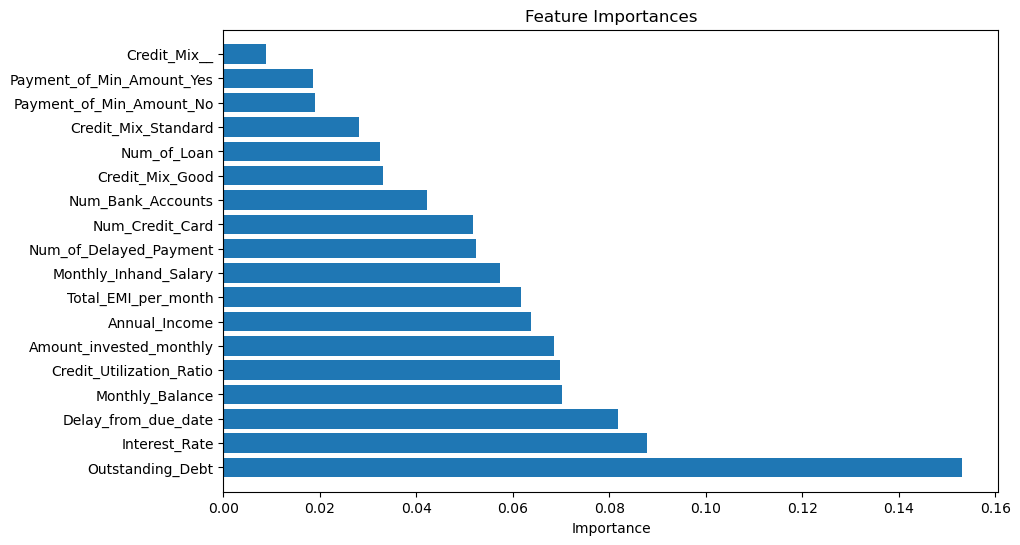

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming data_encoded is your DataFrame
X = data_encoded.drop(columns=['Credit_Score'])
y = data_encoded['Credit_Score']

# Train a Random Forest Classifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")  # Change barh for horizontal bar plot
plt.yticks(range(X.shape[1]), [features[i] for i in indices])       # Use yticks for labels on y-axis
plt.ylim([-1, X.shape[1]])                                         # Adjust limits for y-axis
plt.xlabel("Importance")
plt.show()


In [19]:
# Dropping columns with lower importance scores
columns_to_drop = ['Credit_Mix_Good', 'Credit_Mix_Standard',
                   'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No', 'Credit_Mix__']
data_cleaned_dropped = data_encoded.drop(columns=columns_to_drop)



In [20]:
data_cleaned_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  float64
 3   Num_Credit_Card           100000 non-null  float64
 4   Interest_Rate             100000 non-null  float64
 5   Num_of_Loan               100000 non-null  float64
 6   Delay_from_due_date       100000 non-null  float64
 7   Num_of_Delayed_Payment    100000 non-null  float64
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Total_EMI_per_month       100000 non-null  float64
 11  Amount_invested_monthly   100000 non-null  float64
 12  Monthly_Balance           100000 non-null  float64
 13  Credit_Score              100000 non-null  ob

In [21]:
data_cleaned_dropped.head(10)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.000000,809.98,26.822620,49.574949,80.415295,312.494089,Good
1,19114.12,4194.170850,3.0,4.0,3.0,4.0,-1.0,30.946268,809.98,31.944960,49.574949,118.280222,284.629162,Good
2,19114.12,4194.170850,3.0,4.0,3.0,4.0,3.0,7.000000,809.98,28.609352,49.574949,81.699521,331.209863,Good
3,19114.12,4194.170850,3.0,4.0,3.0,4.0,5.0,4.000000,809.98,31.377862,49.574949,199.458074,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,30.946268,809.98,24.797347,49.574949,41.420153,341.489231,Good
5,19114.12,4194.170850,3.0,4.0,3.0,4.0,8.0,4.000000,809.98,27.262259,49.574949,62.430172,340.479212,Good
6,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.000000,809.98,22.537593,49.574949,178.344067,244.565317,Good
7,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.000000,809.98,23.933795,49.574949,24.785217,358.124168,Standard
8,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.000000,605.03,24.464031,18.816215,104.291825,470.690627,Standard
9,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.000000,605.03,38.550848,18.816215,40.391238,484.591214,Good


In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data into features (X) and target variable (y)
X = data_cleaned_dropped.drop(columns=['Credit_Score'])
y = data_cleaned_dropped['Credit_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature Importance
# Train a Random Forest Classifier to analyze feature importances
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values()
print("Feature Importances (Random Forest):")
print(feature_importances)


Feature Importances (Random Forest):
Num_of_Loan                 0.039374
Num_Bank_Accounts           0.055441
Monthly_Inhand_Salary       0.062302
Num_Credit_Card             0.062464
Num_of_Delayed_Payment      0.066101
Total_EMI_per_month         0.066993
Annual_Income               0.070031
Amount_invested_monthly     0.073224
Credit_Utilization_Ratio    0.074364
Monthly_Balance             0.076099
Delay_from_due_date         0.089300
Interest_Rate               0.106196
Outstanding_Debt            0.158112
dtype: float64


### Class Imbalance

The target labels had a class imbalance issue.

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


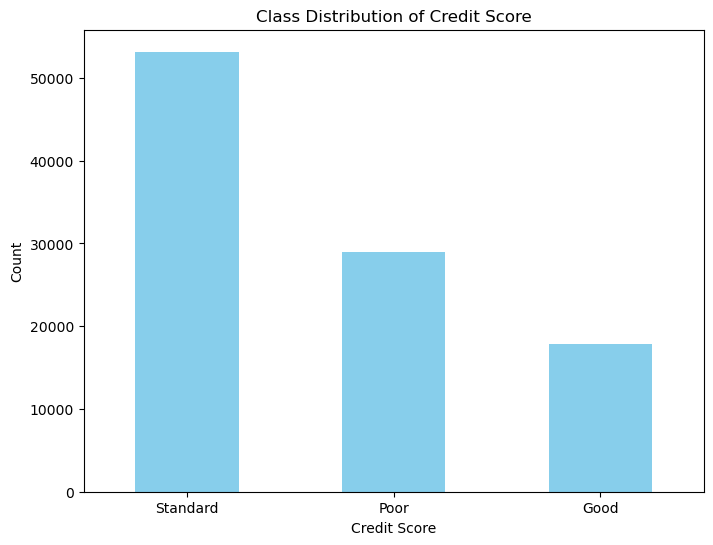

In [23]:
#checking fo class imbalance
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = data_cleaned_dropped['Credit_Score'].value_counts()
print(class_counts)

# Plot a bar chart to visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

### Feature Scaling

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split data into features (X) and target variable (y)
X = data_cleaned_dropped.drop(columns=['Credit_Score'])
y = data_cleaned_dropped['Credit_Score']

# Convert target labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize MinMaxScaler and StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled= minmax_scaler.transform(X_test)



## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced', n_estimators=200)

# Train Random Forest Classifier
rf_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print("RF Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print("RF Precision:", precision_score(y_test_encoded, y_pred_rf, average='weighted'))
print("RF Recall:", recall_score(y_test_encoded, y_pred_rf, average='weighted'))
print("RF F1 Score:", f1_score(y_test_encoded, y_pred_rf, average='weighted'))
print(classification_report(y_test_encoded, y_pred_rf))


Random Forest Classifier:
RF Accuracy: 0.77945
RF Precision: 0.77874642744049
RF Recall: 0.77945
RF F1 Score: 0.77840178949572
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      3527
           1       0.79      0.79      0.79      5874
           2       0.78      0.81      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.78     20000



### Stacking Technique

Since most of models like SVM, KNN performed poorly with our dataset but ensemble methods permormed fairly well, we tested the stacking approach to achieve improved accuracies. 

The results were better compared to other singular models which led to the conclusion that ensemble techniques were the best choice for the problem at hand. 

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators for the stacking classifier
base_estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=100)),
    ('dt', DecisionTreeClassifier())
]

# Initialize stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_estimators, 
    final_estimator=LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
)

# Train stacking classifier
stacking_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_stacking = stacking_classifier.predict(X_test_scaled)

# Evaluate stacking classifier
print("Stacking Classifier1:")
print("SC1 Accuracy:", accuracy_score(y_test_encoded, y_pred_stacking))
print("SC1 Precision:", precision_score(y_test_encoded, y_pred_stacking, average='weighted'))
print("SC1 Recall:", recall_score(y_test_encoded, y_pred_stacking, average='weighted'))
print("SC1 F1 Score:", f1_score(y_test_encoded, y_pred_stacking, average='weighted'))
print(classification_report(y_test_encoded, y_pred_stacking))


Stacking Classifier1:
SC1 Accuracy: 0.7758
SC1 Precision: 0.7753780948425454
SC1 Recall: 0.7758
SC1 F1 Score: 0.7748934999998138
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3527
           1       0.79      0.77      0.78      5874
           2       0.78      0.81      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.77     20000



### Stacking Classifier 2

In [30]:
from xgboost import XGBClassifier

# Define base estimators for the stacking classifier
base_estimators = [
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=100)),
    ('dt', DecisionTreeClassifier()),
    ('xgb', XGBClassifier())
]

# Initialize stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_estimators, 
    final_estimator=LogisticRegression(max_iter=1000)  
)

# Train stacking classifier
stacking_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_stacking2 = stacking_classifier.predict(X_test_scaled)

# Evaluate stacking classifier
print("Stacking Classifier2:")
print("SC2 Accuracy:", accuracy_score(y_test_encoded, y_pred_stacking2))
print("SC2 Precision:", precision_score(y_test_encoded, y_pred_stacking2, average='weighted'))
print("SC2 Recall:", recall_score(y_test_encoded, y_pred_stacking2, average='weighted'))
print("SC2 F1 Score:", f1_score(y_test_encoded, y_pred_stacking2, average='weighted'))
print(classification_report(y_test_encoded, y_pred_stacking2))

Stacking Classifier2:
SC2 Accuracy: 0.7782
SC2 Precision: 0.7777718520395422
SC2 Recall: 0.7782
SC2 F1 Score: 0.7773138020875415
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      3527
           1       0.79      0.78      0.78      5874
           2       0.78      0.81      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.76     20000
weighted avg       0.78      0.78      0.78     20000



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from xgboost import XGBClassifier

### Decision Tree

In [94]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifier
dt_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print("DT Accuracy:", accuracy_score(y_test_encoded, y_pred_dt))
print("DT Precision:", precision_score(y_test_encoded, y_pred_dt, average='weighted'))
print("DT Recall:", recall_score(y_test_encoded, y_pred_dt, average='weighted'))
print("DT F1 Score:", f1_score(y_test_encoded, y_pred_dt, average='weighted'))
print(classification_report(y_test_encoded, y_pred_dt))

Decision Tree Classifier:
DT Accuracy: 0.69865
DT Precision: 0.6981778005675496
DT Recall: 0.69865
DT F1 Score: 0.6982613313226304
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      3527
           1       0.71      0.68      0.70      5874
           2       0.72      0.74      0.73     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.67      0.68     20000
weighted avg       0.70      0.70      0.70     20000



### XGBoost Classifier

In [95]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train XGBoost Classifier
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate XGBoost Classifier
print("XGBoost Classifier:")
print("XGB Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("XGB Precision:", precision_score(y_test_encoded, y_pred_xgb, average='weighted'))
print("XGB Recall:", recall_score(y_test_encoded, y_pred_xgb, average='weighted'))
print("XGB F1 Score:", f1_score(y_test_encoded, y_pred_xgb, average='weighted'))
print(classification_report(y_test_encoded, y_pred_xgb))


XGBoost Classifier:
XGB Accuracy: 0.732
XGB Precision: 0.7305602662710615
XGB Recall: 0.732
XGB F1 Score: 0.7305723934312458
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      3527
           1       0.74      0.72      0.73      5874
           2       0.74      0.78      0.76     10599

    accuracy                           0.73     20000
   macro avg       0.72      0.70      0.71     20000
weighted avg       0.73      0.73      0.73     20000



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

### Logistic Regression

In [35]:
from sklearn.metrics import classification_report
# Step 2: Handle Missing Values
# Simple imputation of missing values
imputer = SimpleImputer(strategy='mean')

# Step 3: Feature Scaling
scaler = StandardScaler()

# Step 4: Address Class Imbalance
# Apply RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler()


# Step 5: Define Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Step 6: Create a pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('logistic_regression', logistic_regression)
])


# Step 8: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'logistic_regression__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_regression__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_encoded)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Step 9: Evaluate the model
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test_scaled)
print("LR Classifier:")
print("LR Accuracy:", accuracy_score(y_test_encoded, y_pred_lr))
print("LR Precision:", precision_score(y_test_encoded, y_pred_lr, average='weighted'))
print("LR Recall:", recall_score(y_test_encoded, y_pred_lr, average='weighted'))
print("LR F1 Score:", f1_score(y_test_encoded, y_pred_lr, average='weighted'))

print(classification_report(y_test_encoded, y_pred_lr))

Best parameters: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l2'}
Best cross-validation score: 0.56825
LR Classifier:
LR Accuracy: 0.56975
LR Precision: 0.5649798521433902
LR Recall: 0.56975
LR F1 Score: 0.526744869690643
              precision    recall  f1-score   support

           0       0.52      0.13      0.20      3527
           1       0.58      0.37      0.46      5874
           2       0.57      0.83      0.67     10599

    accuracy                           0.57     20000
   macro avg       0.56      0.44      0.44     20000
weighted avg       0.56      0.57      0.53     20000



## Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network Classifier with custom parameters
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Train Neural Network Classifier
nn_classifier.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_nn = nn_classifier.predict(X_test_scaled)

# Evaluate Neural Network Classifier
print("Neural Network Classifier:")
print("NN Accuracy:", accuracy_score(y_test_encoded, y_pred_nn))
print("NN Precision:", precision_score(y_test_encoded, y_pred_nn, average='weighted'))
print("NN Recall:", recall_score(y_test_encoded, y_pred_nn, average='weighted'))
print("NN F1 Score:", f1_score(y_test_encoded, y_pred_nn, average='weighted'))
print(classification_report(y_test_encoded, y_pred_nn))



Neural Network Classifier:
NN Accuracy: 0.6617
NN Precision: 0.6590471608051918
NN Recall: 0.6617
NN F1 Score: 0.6569295523153904
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      3527
           1       0.64      0.74      0.69      5874
           2       0.69      0.70      0.70     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.62      0.62     20000
weighted avg       0.66      0.66      0.66     20000

